In [52]:
%config Completer.use_jedi = False

In [323]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import csv
from ast import literal_eval
def load_logs(folder_path,filetype="csv"):
    logdir = "../logs/"
    logFiles = {}
    if not folder_path.startswith(logdir):
        folder_path = logdir + folder_path
    if not folder_path[-1] == "/":
        folder_path = folder_path + "/"
    
    for logfile in glob.glob("{}*.{}".format(folder_path,filetype)):
        filename = logfile.split("/")[-1]
        

        file = pd.read_csv(logfile)
        
        logFiles[filename[:-4]] = file
        
    return logFiles

data_50_best_fuel_max_end_set = load_logs("2021-02-11/JMetal-50-Nodes-Best-Selector/Total_Fuel_Max_Endpoints_set")
data_50_best_fuel_max = load_logs("2021-02-11/JMetal-50-Nodes-Best-Selector/Total_Fuel_Max_Endpoints_Not_set")
data_50_best_fuel_end_set = load_logs("2021-02-11/JMetal-50-Nodes-Best-Selector/Total_Fuel_Endpoints_set")
data_50_best_fuel = load_logs("2021-02-11/JMetal-50-Nodes-Best-Selector/Total_Fuel_Endpoints_Not_set")

data_50_random_fuel_max_end_set = load_logs("2021-02-11/JMetal-50-Nodes-Random-Selector/Total_Fuel_Max_Endpoints_set")
data_50_random_fuel_max = load_logs("2021-02-11/JMetal-50-Nodes-Random-Selector/Total_Fuel_Max_Endpoints_Not_set")
data_50_random_fuel_end_set = load_logs("2021-02-11/JMetal-50-Nodes-Random-Selector/Total_Fuel_Endpoints_set")
data_50_random_fuel = load_logs("2021-02-11/JMetal-50-Nodes-Random-Selector/Total_Fuel_Endpoints_Not_set")

data_10_fuel_max_end_set = load_logs("2021-02-11/JMetal-10-Nodes/Total_Fuel_Max_Endpoints_set")
data_10_fuel_max = load_logs("2021-02-11/JMetal-10-Nodes/Total_Fuel_Max_Endpoints_Not_set")
data_10_fuel_end_set = load_logs("2021-02-11/JMetal-10-Nodes/Total_Fuel_Endpoints_set")
data_10_fuel = load_logs("2021-02-11/JMetal-10-Nodes/Total_Fuel_Endpoints_Not_set")



In [311]:
def plot_same_algorithm(algorithm_logs: dict,field:str,take_mean:False,plot_title:str,ylabel:str,nameDict:dict,xlabel="Iterations",ax=None):
    names = algorithm_logs.keys()
    ax = ax or plt.gca()
    
    for name in names:
        plotData = algorithm_logs[name]
        
        if take_mean:
            plotData = plotData.to_numpy()
            plotData = np.array([literal_eval(plotData[i]) for i in range(len(plotData))])
            ax.plot(list(np.mean(plotData,axis = 0)),label=name,linewidth=2)
        else:
            ax.plot(plotData,label=name)
        ax.legend(prop={'size': 16})
        
    ax.set_xlabel(xlabel,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.tick_params(labelsize=12)
    ax.set_title(plot_title,fontsize=16)

def plot_algorithms(algorithm_logs: dict,field:str,take_mean:False,plot_title:str,ylabel:str,nameDict:dict,xlabel="Iterations",ax=None):
    names = list(filter(lambda x: "Observer" in x,algorithm_logs.keys()))
    ax = ax or plt.gca()
    
    for name in names:
        plotData = algorithm_logs[name][field]
        
        if take_mean:
            plotData = plotData.to_numpy()
            plotData = np.array([literal_eval(plotData[i]) for i in range(len(plotData))])
            ax.plot(list(np.mean(plotData,axis = 0)),label=nameDict[name],linewidth=2)
        else:
            ax.plot(plotData,label=nameDict[name])
        ax.legend(prop={'size': 16})
        
    ax.set_xlabel(xlabel,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.tick_params(labelsize=12)
    ax.set_title(plot_title,fontsize=16)
    
def extract_algorithm_data(dataDicts:list,fieldName:str,algorithmName:str,newColumnNames:list):
    dataFields = {}
    for columnName,dataDict in zip(newColumnNames,dataDicts):
        dataFields[columnName]=(dataDict[algorithmName][fieldName])
    return pd.DataFrame(dataFields)

# Plot Comparisons between Algorithms for 10 Nodes

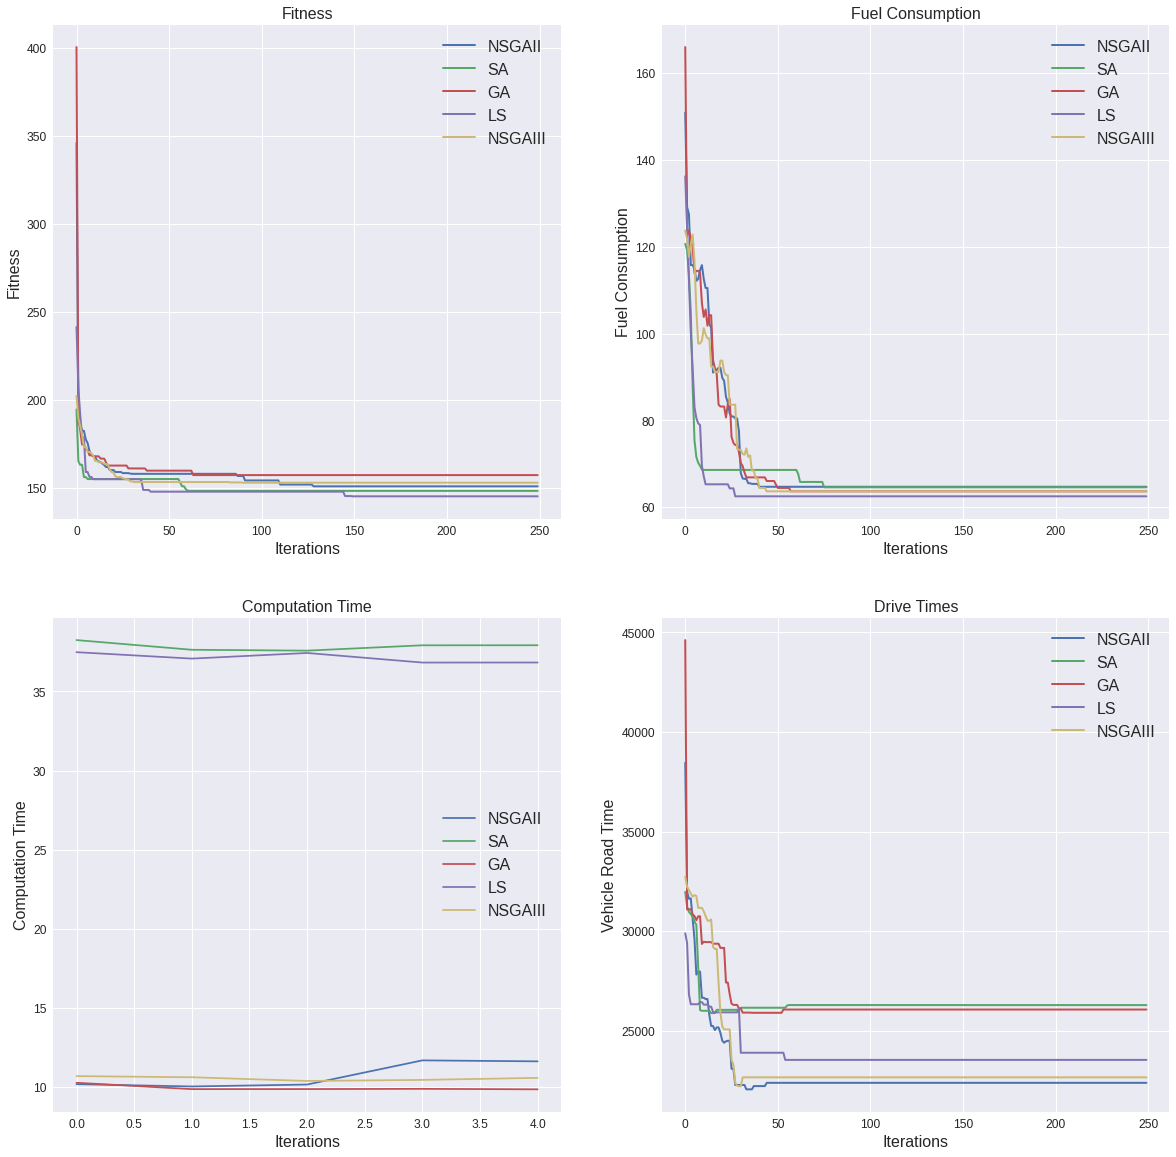

In [312]:

    
fig,axs = plt.subplots(2,2,figsize=(20,20))
plt.style.use('seaborn')

nameDict = {"Observer_SA":"SA","Observer_LS":"LS","Observer_NSGAIII":"NSGAIII","Observer_NSGAII":"NSGAII","Observer_GA":"GA"}

plot_algorithms(data_10_fuel_max_end_set,'fitness',True,"Fitness","Fitness",nameDict,ax=axs[0][0])
plot_algorithms(data_10_fuel_max,'fuel_consumption',True,"Fuel Consumption","Fuel Consumption",nameDict,ax=axs[0][1])
plot_algorithms(data_10_fuel_end_set,'computation_time',False,"Computation Time","Computation Time",nameDict,ax=axs[1][0])
plot_algorithms(data_10_fuel,'meanDriveTimes',True,"Drive Times","Vehicle Road Time",nameDict,ax=axs[1][1])

plt.show()



# Plot comparison between algorithms 50 Nodes with random selection for generation algorithms

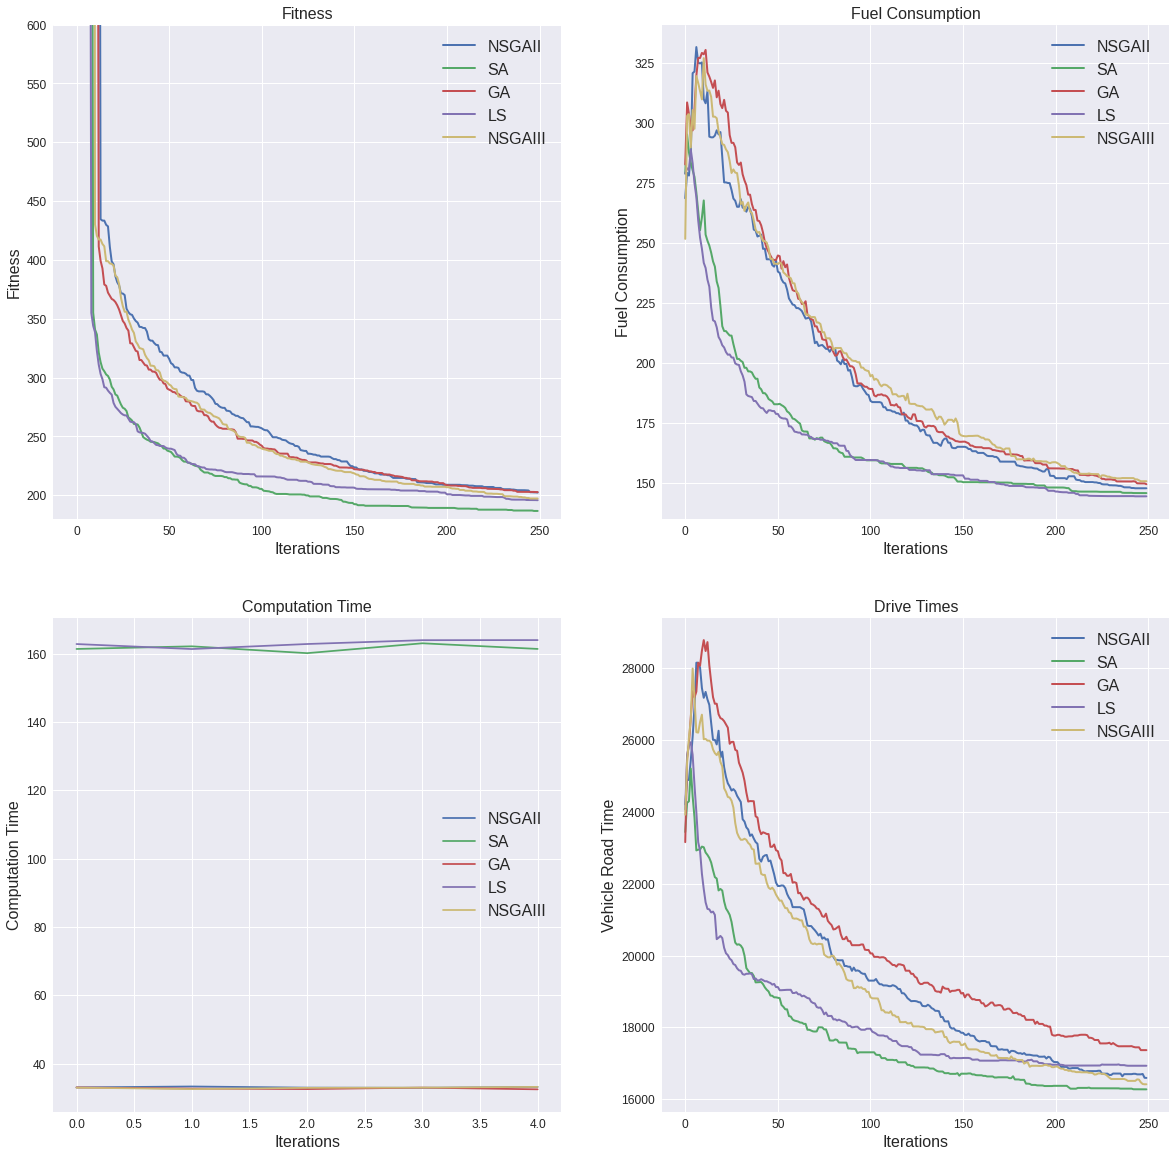

In [321]:

    
fig,axs = plt.subplots(2,2,figsize=(20,20))
plt.style.use('seaborn')

nameDict = {"Observer_SA":"SA","Observer_LS":"LS","Observer_NSGAIII":"NSGAIII","Observer_NSGAII":"NSGAII","Observer_GA":"GA"}

plot_algorithms(data_50_random_fuel_max_end_set,'fitness',True,"Fitness","Fitness",nameDict,ax=axs[0][0])
plot_algorithms(data_50_random_fuel_max,'fuel_consumption',True,"Fuel Consumption","Fuel Consumption",nameDict,ax=axs[0][1])
plot_algorithms(data_50_random_fuel_end_set,'computation_time',False,"Computation Time","Computation Time",nameDict,ax=axs[1][0])
plot_algorithms(data_50_random_fuel,'meanDriveTimes',True,"Drive Times","Vehicle Road Time",nameDict,ax=axs[1][1])
axs[0][0].set_ylim(180,600)
plt.show()

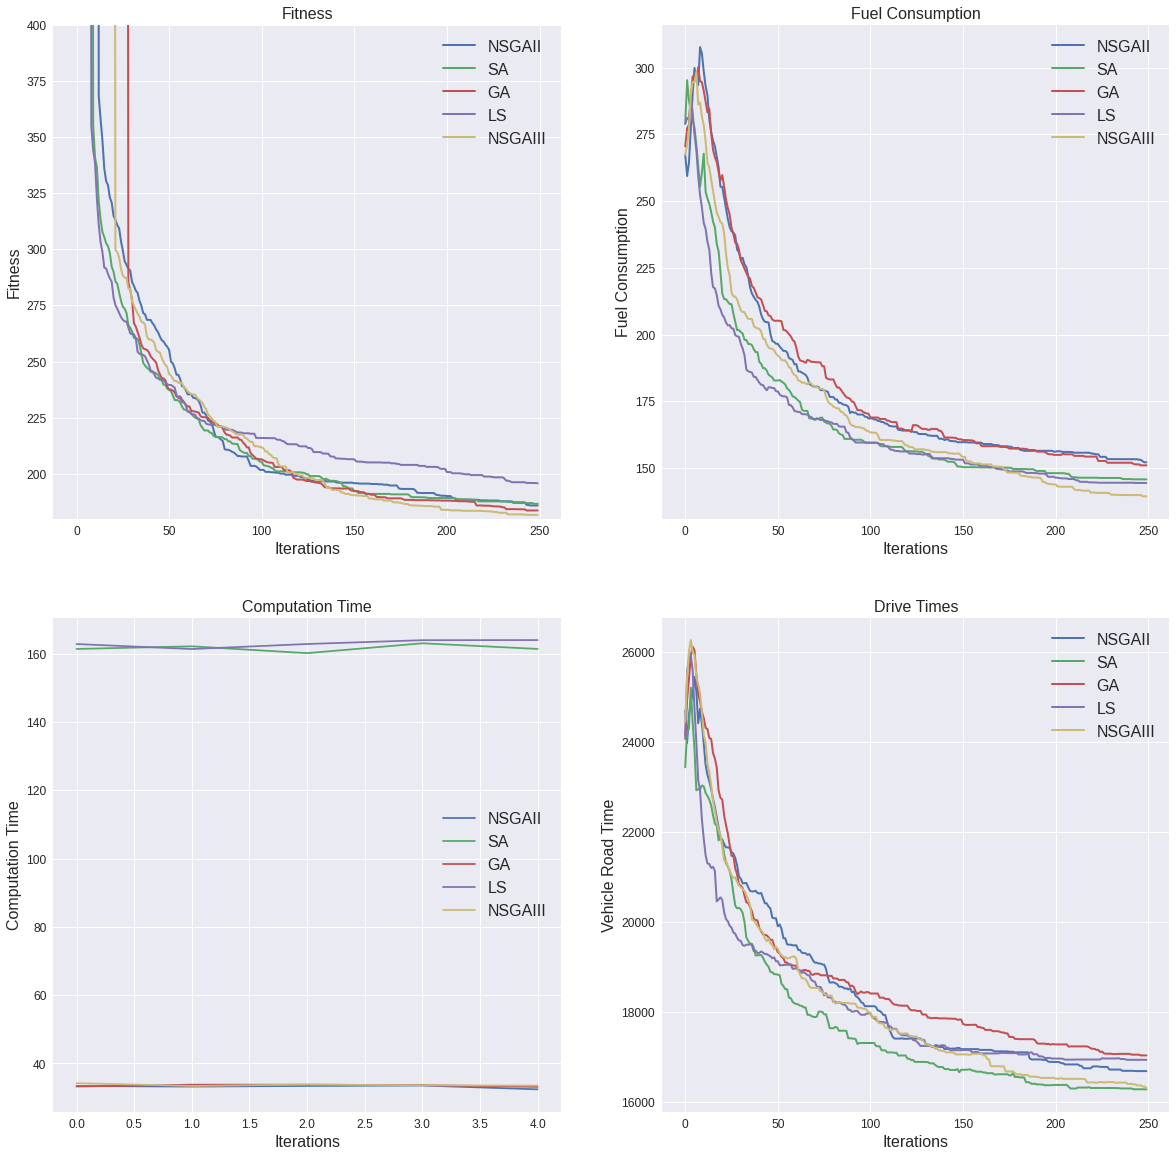

In [324]:

    
fig,axs = plt.subplots(2,2,figsize=(20,20))
plt.style.use('seaborn')

nameDict = {"Observer_SA":"SA","Observer_LS":"LS","Observer_NSGAIII":"NSGAIII","Observer_NSGAII":"NSGAII","Observer_GA":"GA"}

plot_algorithms(data_50_best_fuel_max_end_set,'fitness',True,"Fitness","Fitness",nameDict,ax=axs[0][0])
plot_algorithms(data_50_best_fuel_max,'fuel_consumption',True,"Fuel Consumption","Fuel Consumption",nameDict,ax=axs[0][1])
plot_algorithms(data_50_best_fuel_end_set,'computation_time',False,"Computation Time","Computation Time",nameDict,ax=axs[1][0])
plot_algorithms(data_50_best_fuel,'meanDriveTimes',True,"Drive Times","Vehicle Road Time",nameDict,ax=axs[1][1])
axs[0][0].set_ylim(180,400)
plt.show()

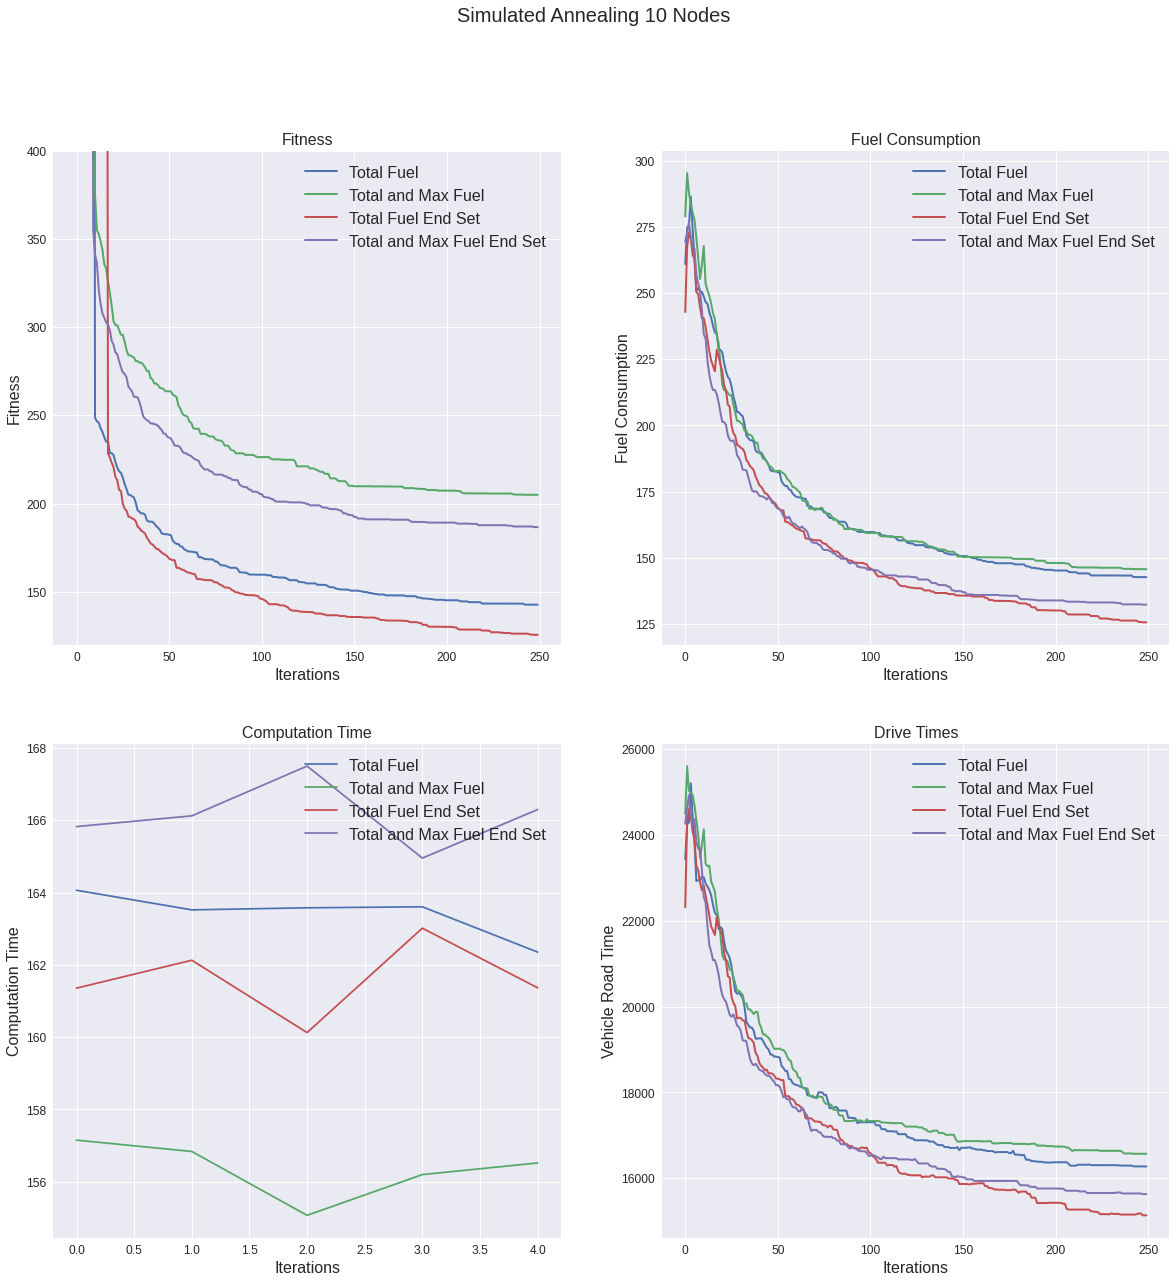

In [337]:
fig,axs = plt.subplots(2,2,figsize=(20,20))
plt.style.use('seaborn')

#SA_data = [data_10_fuel,data_10_fuel_max,data_10_fuel_end_set,data_10_fuel_max_end_set]
SA_data = [data_50_best_fuel,data_50_best_fuel_max,data_50_best_fuel_end_set,data_50_best_fuel_max_end_set]
SA_10_comparison_fitness = extract_algorithm_data(SA_data,
                                          "fitness","Observer_SA",["Total Fuel","Total and Max Fuel","Total Fuel End Set","Total and Max Fuel End Set"])

SA_10_comparison_fuel = extract_algorithm_data(SA_data,
                                          "fuel_consumption","Observer_SA",["Total Fuel","Total and Max Fuel","Total Fuel End Set","Total and Max Fuel End Set"])

SA_10_comparison_computation_time = extract_algorithm_data(SA_data,
                                          "computation_time","Observer_SA",["Total Fuel","Total and Max Fuel","Total Fuel End Set","Total and Max Fuel End Set"])

SA_10_comparison_drive_time = extract_algorithm_data(SA_data,
                                          "meanDriveTimes","Observer_SA",["Total Fuel","Total and Max Fuel","Total Fuel End Set","Total and Max Fuel End Set"])

plot_same_algorithm(SA_10_comparison_fitness,'fitness',True,"Fitness","Fitness",nameDict,ax=axs[0][0])
plot_same_algorithm(SA_10_comparison_fuel,'fuel_consumption',True,"Fuel Consumption","Fuel Consumption",nameDict,ax=axs[0][1])
plot_same_algorithm(SA_10_comparison_computation_time,'computation_time',False,"Computation Time","Computation Time",nameDict,ax=axs[1][0])
plot_same_algorithm(SA_10_comparison_drive_time,'meanDriveTimes',True,"Drive Times","Vehicle Road Time",nameDict,ax=axs[1][1])
plt.suptitle("Simulated Annealing 10 Nodes",fontsize=20)
axs[0][0].set_ylim(120,400)
plt.show()

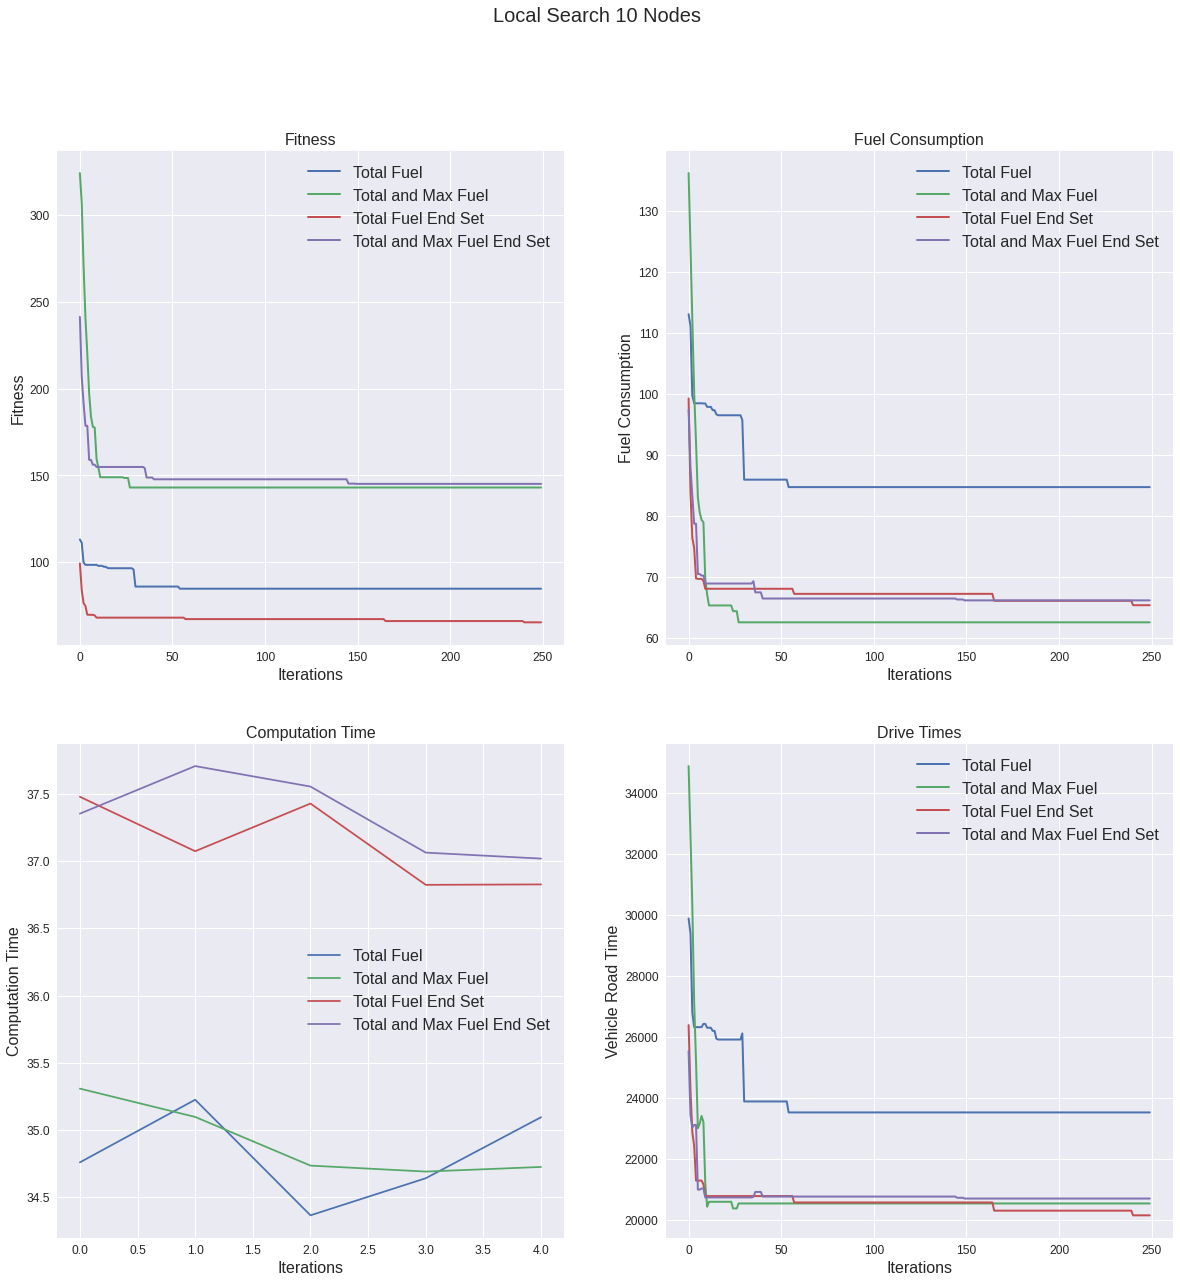

In [329]:
fig,axs = plt.subplots(2,2,figsize=(20,20))
plt.style.use('seaborn')

LS_10_comparison_fitness = extract_algorithm_data([data_10_fuel,data_10_fuel_max,data_10_fuel_end_set,data_10_fuel_max_end_set],
                                          "fitness","Observer_LS",["Total Fuel","Total and Max Fuel","Total Fuel End Set","Total and Max Fuel End Set"])

LS_10_comparison_fuel = extract_algorithm_data([data_10_fuel,data_10_fuel_max,data_10_fuel_end_set,data_10_fuel_max_end_set],
                                          "fuel_consumption","Observer_LS",["Total Fuel","Total and Max Fuel","Total Fuel End Set","Total and Max Fuel End Set"])

LS_10_comparison_computation_time = extract_algorithm_data([data_10_fuel,data_10_fuel_max,data_10_fuel_end_set,data_10_fuel_max_end_set],
                                          "computation_time","Observer_LS",["Total Fuel","Total and Max Fuel","Total Fuel End Set","Total and Max Fuel End Set"])

LS_10_comparison_drive_time = extract_algorithm_data([data_10_fuel,data_10_fuel_max,data_10_fuel_end_set,data_10_fuel_max_end_set],
                                          "meanDriveTimes","Observer_LS",["Total Fuel","Total and Max Fuel","Total Fuel End Set","Total and Max Fuel End Set"])



plot_same_algorithm(LS_10_comparison_fitness,'fitness',True,"Fitness","Fitness",nameDict,ax=axs[0][0])
plot_same_algorithm(LS_10_comparison_fuel,'fuel_consumption',True,"Fuel Consumption","Fuel Consumption",nameDict,ax=axs[0][1])
plot_same_algorithm(LS_10_comparison_computation_time,'computation_time',False,"Computation Time","Computation Time",nameDict,ax=axs[1][0])
plot_same_algorithm(LS_10_comparison_drive_time,'meanDriveTimes',True,"Drive Times","Vehicle Road Time",nameDict,ax=axs[1][1])
plt.suptitle("Local Search 10 Nodes",fontsize=20)
plt.show()

In [ ]:
def plot_algorithms(algorithm_logs: dict,field:str,take_mean:False,plot_title:str,ylabel:str,nameDict:dict,xlabel="Iterations",ax=None):
    names = list(filter(lambda x: "Observer" in x,algorithm_logs.keys()))
    ax = ax or plt.gca()
    
    for name in names:
        plotData = algorithm_logs[name][field]
        
        if take_mean:
            plotData = plotData.to_numpy()
            plotData = np.array([literal_eval(plotData[i]) for i in range(len(plotData))])
            ax.plot(list(np.mean(plotData,axis = 0)),label=nameDict[name],linewidth=2)
        else:
            ax.plot(plotData,label=nameDict[name])
        ax.legend(prop={'size': 16})
        
    ax.set_xlabel(xlabel,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.tick_params(labelsize=12)
    ax.set_title(plot_title,fontsize=16)
    

fig,axs = plt.subplots(2,2,figsize=(20,20))
plt.style.use('seaborn')

nameDict = {"Observer_SA":"SA","Observer_LS":"LS","Observer_NSGAIII":"NSGAIII","Observer_NSGAII":"NSGAII","Observer_GA":"GA"}

plot_algorithms(data_10_fuel,'fitness',True,"Fitness","Fitness",nameDict,ax=axs[0][0])
plot_algorithms(data_10_fuel,'fuel_consumption',True,"Fuel Consumption","Fuel Consumption",nameDict,ax=axs[0][1])
plot_algorithms(data_10_fuel,'computation_time',False,"Computation Time","Computation Time",nameDict,ax=axs[1][0])
plot_algorithms(data_10_fuel,'meanDriveTimes',True,"Drive Times","Vehicle Road Time",nameDict,ax=axs[1][1])

plt.show()

In [271]:
d

0    [190.6885269264591, 118.44640855091924, 118.44...
1    [148.36391207438083, 119.03078745144211, 116.4...
2    [199.96502858469228, 125.71767494141454, 123.0...
3    [121.39946793819107, 121.39946793819107, 121.3...
4    [139.52590558702582, 121.39946793819107, 120.7...
Name: fitness, dtype: object

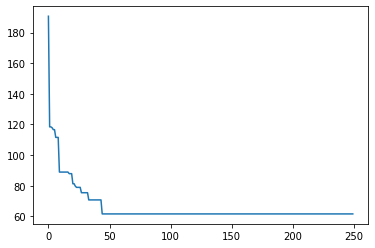

In [117]:
d = data_10_fuel["Observer_NSGAII"]["fitness"].apply(literal_eval)
plt.plot()

# Plot data for 10 nodes


# Plot comparisons between models for 50 nodes

# Plot comparison for every model for 50 nodes